In [67]:
%matplotlib widget

In [68]:
from non_dominated_surface import compute_non_dominated_surface
from build_model import build_model, get_instance
import matplotlib.pyplot as plt
from matplotlib import cm
import os

In [69]:
import time

instance_filename = "medium_instance.json"
data = get_instance(instance_filename)
model = build_model(data, with_epsilon_constraint=True)
t0 = time.time()
non_dominated_models = compute_non_dominated_surface(model, data)
print(f"Time spent: {time.time() - t0}")

max_duration <= 22, max_assigned <= 15
Objective: 412.96400000000006, max_duration: 11, max_assigned: 5

max_duration <= 22, max_assigned <= 4
Objective: 404.9680000000001, max_duration: 12, max_assigned: 4

max_duration <= 22, max_assigned <= 3
Objective: 381.97300000000007, max_duration: 12, max_assigned: 3

max_duration <= 22, max_assigned <= 2
Objective: 325.97800000000007, max_duration: 12, max_assigned: 2

max_duration <= 22, max_assigned <= 1
Objective: 193.98199999999997, max_duration: 13, max_assigned: 1

max_duration <= 12, max_assigned <= 15
Objective: 412.96400000000006, max_duration: 11, max_assigned: 5

max_duration <= 12, max_assigned <= 4
Objective: 404.9680000000001, max_duration: 12, max_assigned: 4

max_duration <= 12, max_assigned <= 3
Objective: 381.97300000000007, max_duration: 12, max_assigned: 3

max_duration <= 12, max_assigned <= 2
Objective: 325.97800000000007, max_duration: 12, max_assigned: 2

max_duration <= 12, max_assigned <= 1
Objective: 193.983, max_du

In [70]:
# Saving results
os.makedirs("results", exist_ok=True)
f = open(os.path.join("results", f"{instance_filename.split('.')[0]}_complete.txt"), "w+")
f.write(str(non_dominated_models))
f.close()

In [71]:
def get_objective_value(models, max_duration, max_assigned):
    for model in models : 
        if model["max_duration"] == max_duration and model["max_assigned"] == max_assigned : 
            return model["objVal"]
    return None #ValueError("value not found")

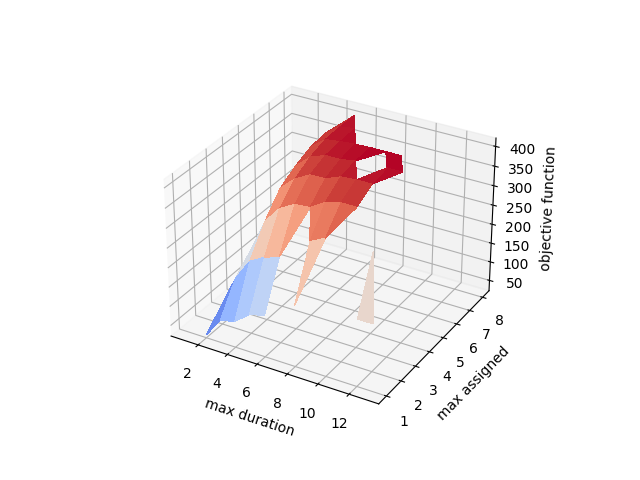

In [72]:
import numpy as np 

max_duration_max = int(max([model["max_duration"] for model in non_dominated_models]))
max_assigned_max = int(max([model["max_assigned"] for model in non_dominated_models]))

X = [i for i in range(1, max_duration_max+1)]
Y = [i for i in range(1, max_assigned_max+1)]
Z = np.zeros((max_duration_max, max_assigned_max))
for i in range(len(X)): 
    for j in range(len(Y)): 
        Z[i][j] = get_objective_value(non_dominated_models, X[i], Y[j])
Y, X = np.meshgrid(Y, X)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel("max duration")
ax.set_ylabel("max assigned")
ax.set_zlabel("objective function")

plt.show()